In [1]:
import warnings

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [6]:
import statsmodels.api as sm

In [7]:
%matplotlib inline

In [8]:
from math import sqrt

In [11]:
from sklearn.metrics import mean_squared_error

In [12]:
from matplotlib.pylab import rcParams

In [13]:
from xgboost import XGBRegressor

ModuleNotFoundError: No module named 'xgboost'

In [14]:
conda install -c conda-forge xgboost

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\rcmlp.12\Anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          11 KB  conda-forge
    ca-certificates-2021.10.8  |       h5b45459_0         176 KB  conda-forge
    certifi-2021.10.8          |   py38haa244fe_1         145 KB  conda-forge
    conda-4.11.0               |   py38haa244fe_0        16.9 MB  conda-forge
    libxgboost-1.5.1           |       h0e60522_0         2.3 MB  conda-forge
    openssl-1.1.1l             |       h8ffe710_0         5.7 MB  conda-forge
    py-xgboost-1.5.1           |   py38haa244fe_0         151 KB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    xgboost-1.5.1              |   py38haa244fe_0          12 KB  conda-forge



==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [20]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [21]:
from xgboost import XGBRegressor

In [22]:
from xgboost import XGBRFRegressor

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
from xgboost import plot_importance, plot_tree

In [25]:
plt.style.use('fivethirtyeight')

In [26]:
import warnings

In [27]:
warnings.filterwarnings("ignore")

In [29]:
df= pd.read_excel("C:\\Users\\rcmlp.12\\Desktop\\models hypertune\\Second_thursday_plan.xlsx")


In [35]:
df.head()

,DT,PIREP,OOS,CR,INT,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188
0,202101,18,NaN,6,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202101,10,96.0,22,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202101,19,17.0,17,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,202101,20,57.0,12,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,202101,23,17.0,12,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
print(df.corr())

                    DT     PIREP       OOS        CR     INT    Unnamed: 5  \
DT            1.000000  0.195545 -0.060440  0.179975  0.009300         NaN   
PIREP         0.195545  1.000000 -0.008253  0.104708  0.283153         NaN   
OOS          -0.060440 -0.008253  1.000000  0.056960  0.149175         NaN   
CR            0.179975  0.104708  0.056960  1.000000  0.078342         NaN   
INT           0.009300  0.283153  0.149175  0.078342  1.000000         NaN   
...                ...       ...       ...       ...       ...         ...   
Unnamed: 184       NaN       NaN       NaN       NaN       NaN         NaN   
Unnamed: 185       NaN       NaN       NaN       NaN       NaN         NaN   
Unnamed: 186       NaN       NaN       NaN       NaN       NaN         NaN   
Unnamed: 187       NaN       NaN       NaN       NaN       NaN         NaN   
Unnamed: 188       NaN       NaN       NaN       NaN       NaN         NaN   

              Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  .

In [37]:
df1=df.iloc[:,0:5]

In [38]:
df1.head()

,DT,PIREP,OOS,CR,INT
0,202101,18,NaN,6,1
1,202101,10,96.0,22,1
2,202101,19,17.0,17,2
3,202101,20,57.0,12,1
4,202101,23,17.0,12,3


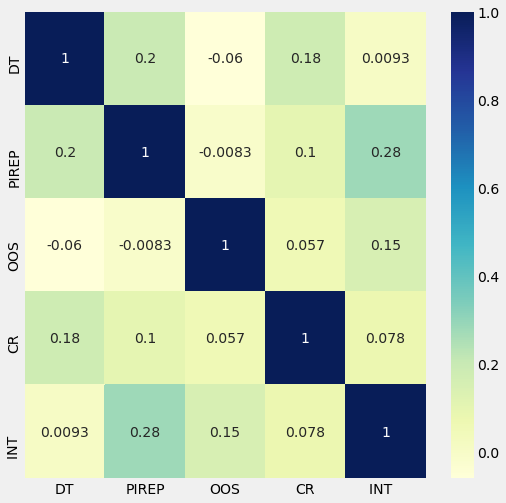

In [40]:
# HEATMAP TO CHECK MULTICOLINEARITY :: 
plt.figure(figsize=(8,8))
dfplot = sns.heatmap(df1.corr(),  cmap="YlGnBu", annot=True)
plt.show()